<a href="https://colab.research.google.com/github/SoIllEconomist/ds4b/blob/master/python_ds4b/02_wrangle/03_tidy_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tidy Data
## Introduction

In this chapter, you will learn a consistent way to organise your data in Python, an organisation called **tidy data**. Getting your data into this format requires some upfront work, but that work pays off in the long term. Once you have tidy data and the tidy tools provided by `pandas`, you will spend much less time munging data from one representation to another, allowing you to spend more time on the analytic questions at hand.

This chapter will give you a practical introduction to tidy data and the accompanying tools in `pandas`. If you’d like to learn more about the underlying theory, you might enjoy the Tidy Data paper published in the Journal of Statistical Software, http://www.jstatsoft.org/v59/i10/paper.

### Prerequisties

In this chapter we'll focus on `pandas`, a package that provides tools to help tidy up your messy datasets. 

In [0]:
import pandas as pd
import numpy as np

You can represent the same underlying data in multiple ways. The example below shows the same data organised in four different ways. Each dataset shows the same values of four variables country, year, population, and cases, but each dataset organises the values in a different way.

**Table 1**

| country     | year  | cases  | population |
|-------------|-------|--------|------------|
| Afghanistan | 1999  | 745    | 19987071   |
| Afghanistan | 2000  | 2666   | 20595360   |
| Brazil      | 1999  | 37737  | 172006362  |
| Brazil      | 2000  | 80488  | 174504898  |
| China       | 1999  | 212258 | 1272915272 |
| China       | 2000  | 213766 | 1280428583 |

**Table 2**

| country     | year | type       | count     |
|-------------|------|------------|-----------|
| Afghanistan | 1999 | cases      | 745       |
| Afghanistan | 1999 | population | 19987071  |
| Afghanistan | 2000 | cases      | 2666      |
| Afghanistan | 2000 | population | 20595360  |
| Brazil      | 1999 | cases      | 37737     |
| Brazil      | 1999 | population | 172006362 |

**Table 3**

| country     | year | rate              |
|-------------|------|-------------------|
| Afghanistan | 1999 | 745/19987071      |
| Afghanistan | 2000 | 2666/20595360     |
| Brazil      | 1999 | 37737/172006362   |
| Brazil      | 2000 | 80488/174504898   |
| China       | 1999 | 212258/1272915272 |
| China       | 2000 | 213766/1280428583 |

Data Spread accross two tables.

**Table 4a: Cases**

| country     | 1999   | 2000   |
|-------------|--------|--------|
| Afghanistan | 745    | 2666   |
| Brazil      | 37737  | 80488  |
| China       | 212258 | 213766 |

**Table 4b: Population**

| country     | 1999       | 2000       |
|-------------|------------|------------|
| Afghanistan | 19987071   | 20595360   |
| Brazil      | 172006362  | 174504898  |
| China       | 1272915272 | 1280428583 |

These are all representations of the same underlying data, but they are not equally easy to use. One dataset, the tidy dataset, will be much easier to work with inside the tidyverse.

There are three interrelated rules which make a dataset tidy:

1. Each variable must have its own column.
1. Each observation must have its own row.
1. Each value must have its own cell.

**Visual Representation of the rules**

![Following three rules makes a dataset tidy: variables are in columns, observations are in rows, and values are in cells.](https://github.com/SoIllEconomist/ds4b/blob/master/python_ds4b/02_wrangle/tidy-1.png?raw=1)

These three rules are interrelated because it’s impossible to only satisfy two of the three. That interrelationship leads to an even simpler set of practical instructions:

1. Put each dataset in a DataFrame.
1. Put each variable in a column.

In this example, only **Table 1** is tidy. It’s the only representation where each column is a variable.

*Why ensure that your data is tidy?* There are two main advantages:

1. There’s a general advantage to picking one consistent way of storing data. If you have a consistent data structure, it’s easier to learn the tools that work with it because they have an underlying uniformity.

1. There’s a specific advantage to placing variables in columns because it allows `pandas`’s vectorised nature to shine. As you learned, most built-in `pandas` functions work with vectors of values. That makes transforming tidy data feel particularly natural.

!ll the other functions/methods in `pandas` are designed to work with tidy data. Here are a couple of small examples showing how you might work with


In [0]:
from io import StringIO
table1 = StringIO("""country     | year  | cases  | population
Afghanistan | 1999  | 745    | 19987071
Afghanistan | 2000  | 2666   | 20595360
Brazil      | 1999  | 37737  | 172006362
Brazil      | 2000  | 80488  | 174504898
China       | 1999  | 212258 | 1272915272
China       | 2000  | 213766 | 1280428583""")

table1 = pd.read_csv(table1, sep="|", )

In [0]:
table1.columns = table1.columns.str.strip()

Compute rate per 10,000

In [0]:
table1.assign(rate = lambda x: x["cases"] / x["population"] * 10000)

,country,year,cases,population,rate
0,Afghanistan,1999,745,19987071,0.372741
1,Afghanistan,2000,2666,20595360,1.294466
2,Brazil,1999,37737,172006362,2.193930
3,Brazil,2000,80488,174504898,4.612363
4,China,1999,212258,1272915272,1.667495
5,China,2000,213766,1280428583,1.669488


Compute cases per year

In [0]:
table1.groupby('year')['cases'].count()

year
1999    3
2000    3
Name: cases, dtype: int64

Visualise changes over time

In [0]:
import seaborn as sns

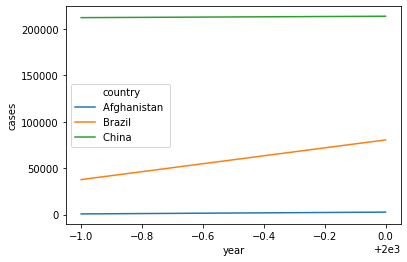

In [0]:
sns.lineplot(x='year',y='cases',hue='country',data=table1);

### Exercises
1. Using prose, describe how the variables and observations are organised in each of the sample tables.

1. Compute the rate for table2, and table4a + table4b. You will need to perform four operations:

  1. Extract the number of TB cases per country per year.
  1. Extract the matching population per country per year.
  1. Divide cases by population, and multiply by 10000.
  1. Store back in the appropriate place.
Which representation is easiest to work with? Which is hardest? Why?

1. Recreate the plot showing change in cases over time using table2 instead of table1. What do you need to do first?

## Spreading and gathering

The principles of tidy data seem so obvious that you might wonder if you’ll ever encounter a dataset that isn’t tidy. Unfortunately, however, most data that you will encounter will be untidy. There are two main reasons:

1. Most people aren’t familiar with the principles of tidy data, and it’s hard to derive them yourself unless you spend a lot of time working with data.

1. Data is often organised to facilitate some use other than analysis. For example, data is often organised to make entry as easy as possible.

This means for most real analyses, you’ll need to do some tidying. The first step is always to figure out what the variables and observations are. Sometimes this is easy; other times you’ll need to consult with the people who originally generated the data. The second step is to resolve one of two common problems:

1. One variable might be spread across multiple columns.

1. One observation might be scattered across multiple rows.

Typically a dataset will only suffer from one of these problems; it’ll only suffer from both if you’re really unlucky! To fix these problems, you’ll need the two most important functions in `pandas`: `melt()` and `pivot_table()`.

### Melt (Gathering)
A common problem is a dataset where some of the column names are not names of variables, but *values* of a variable. Take `table4a`: the column names *1999* and *2000* represent values of the year variable, and each row represents two observations, not one. E.g., we are unpivoting a DataFrame from wide format to long format, optionally leaving identifier variables set.

This function is useful to massage a DataFrame into a format where one or more columns are identifier variables (id_vars), while all other columns, considered measured variables (value_vars), are “unpivoted” to the row axis, leaving just two non-identifier columns, ‘variable’ and ‘value’.

In [0]:
table4a = StringIO("""country|1999|2000
Afghanistan | 745    | 2666   
Brazil      | 37737  | 80488  
China       | 212258 | 213766 
""")
table4a = pd.read_csv(table4a, sep="|")

In [0]:
table4a

,country,1999,2000
0,Afghanistan,745,2666
1,Brazil,37737,80488
2,China,212258,213766


To tidy a dataset like this, we need to **melt** (gather) those columns into a new pair of variables. To describe that operation we need three parameters:

- The set of columns that represent values, not variables. In this example, those are the columns 1999 and 2000.

- The name of the identifier variable(s) is the `id_vars`, and here it is `country`. 

- The name of the variable whose values form the column names. We call that the `var_name`, and here it is `year`.

- The name of the variable whose values are spread over the cells. We call that `value_name`, and here it’s the number of `cases`.

Together those parameters generate the call to `pd.melt()`

In [0]:
table4a = pd.melt(table4a,
        id_vars=["country"],
        value_vars=["1999","2000"],
        var_name = "year",
        value_name="cases"
        )
table4a

,country,year,cases
0,Afghanistan,1999,745
1,Brazil,1999,37737
2,China,1999,212258
3,Afghanistan,2000,2666
4,Brazil,2000,80488
5,China,2000,213766


Here there are only two columns, so we list them individually. Note that “1999” and “2000” are non-syntactic names (because they don’t start with a letter) so we have to surround them in backticks. To refresh your memory of the other ways to select columns. 

![Gathering table4 into a tidy form.](https://github.com/SoIllEconomist/ds4b/blob/master/python_ds4b/02_wrangle/tidy-9.png?raw=1)

In the final result, the gathered columns are dropped, and we get new key and value columns. Otherwise, the relationships between the original variables are preserved. 

We can use `melt()` to tidy `table4b` in a similar fashion. 



In [0]:
table4b = StringIO("""country|1999|2000
Afghanistan | 19987071   | 20595360
Brazil      | 172006362  | 174504898
China       | 1272915272 | 1280428583""")
table4b = pd.read_csv(table4b, sep="|")

In [0]:
table4b = pd.melt(table4b,
        id_vars=["country"],
        value_vars=["1999","2000"],
        var_name = "year",
        value_name="population"
        )
table4b

,country,year,population
0,Afghanistan,1999,19987071
1,Brazil,1999,172006362
2,China,1999,1272915272
3,Afghanistan,2000,20595360
4,Brazil,2000,174504898
5,China,2000,1280428583


To combine the tidied versions of table4a and table4b into a single tibble, we need to use `merge()`, which you’ll learn about in relational data.

In [0]:
pd.merge(table4a, table4b, how="left", on=["country","year"])

,country,year,cases,population
0,Afghanistan,1999,745,19987071
1,Brazil,1999,37737,172006362
2,China,1999,212258,1272915272
3,Afghanistan,2000,2666,20595360
4,Brazil,2000,80488,174504898
5,China,2000,213766,1280428583


## Pivot (Spreading)
Pivoting (spreading) is the opposite of melting (gathering). You use it when an observation is scattered across multiple rows. For example, take `table2`: an observation is a country in a year, but each observation is spread across two rows.

In [0]:
table2 = StringIO("""country|year|type|count
Afghanistan | 1999 | cases      | 745       
Afghanistan | 1999 | population | 19987071  
Afghanistan | 2000 | cases      | 2666      
Afghanistan | 2000 | population | 20595360  
Brazil      | 1999 | cases      | 37737     
Brazil      | 1999 | population | 172006362 """)
table2 = pd.read_csv(table2, sep="|")

In [0]:
table2

,country,year,type,count
0,Afghanistan,1999,cases,745
1,Afghanistan,1999,population,19987071
2,Afghanistan,2000,cases,2666
3,Afghanistan,2000,population,20595360
4,Brazil,1999,cases,37737
5,Brazil,1999,population,172006362


To tidy this up, we first analyse the representation in similar way to `pivot_table()`.


In [0]:
pd.pivot_table(table2, index=["country","year"],values="count", columns="type")

type                cases         population 
country      year                            
Afghanistan  1999           745      19987071
             2000          2666      20595360
Brazil       1999         37737     172006362

![Spreading table2 makes it tidy.](https://github.com/SoIllEconomist/ds4b/blob/master/python_ds4b/02_wrangle/tidy-8.png?raw=1)

As you might have guessed that `melt()` and `pivot_table()` are complements. `melt()` makes wide tables narrower and longer; `pivot_table()` makes long tables shorter and wider.

### Exercises
1.
1. 
1. 
1. 
1. 

## Separating and uniting

So far you’ve learned how to tidy `table2` and `table4`, but not `table3`. `table3` has a different problem: we have one column (`rate`) that contains two variables (`cases` and `population`). To fix this problem, we’ll need the `split()` function. You’ll also learn about the complement of `split()`: `cat()`, which you use if a single variable is spread across multiple columns.

## Separate

`str.split()` pulls apart one column into multiple columns, by splitting whatever a separator character appears. The `expand=True` parameter converts the separated values into new columns. The `astype(int)` converts the string into integer columns. Take `table3`:

In [0]:
table3 = StringIO("""country|year|rate
Afghanistan | 1999 | 745/19987071      
Afghanistan | 2000 | 2666/20595360     
Brazil      | 1999 | 37737/172006362   
Brazil      | 2000 | 80488/174504898   
China       | 1999 | 212258/1272915272 
China       | 2000 | 213766/1280428583 """)
table3 = pd.read_csv(table3, sep="|")

In [0]:
table3[['cases','population']] = table3['rate'].str.split("/", expand=True).astype(int)

![Separating table3 makes it tidy](https://github.com/SoIllEconomist/ds4b/blob/master/python_ds4b/02_wrangle/tidy-17.png?raw=1)

By default, `split()` will split values by `,`. If you wish to use a specific character to separate a column, you can pass the character to the `sep` argument.

Formally, sep is a regular expression, which you’ll learn more about in strings

In [0]:
table3["century"] = table3["year"].astype(str).str[:2]
table3["year"] = table3["year"].astype(str).str[2:]
table3

,country,year,rate,cases,population,century
0,Afghanistan,99,745/19987071,745,19987071,19
1,Afghanistan,00,2666/20595360,2666,20595360,20
2,Brazil,99,37737/172006362,37737,172006362,19
3,Brazil,00,80488/174504898,80488,174504898,20
4,China,99,212258/1272915272,212258,1272915272,19
5,China,00,213766/1280428583,213766,1280428583,20


### Unite
`cat()` is the inverse of `split()1: it combines multiple columns into a single column. You’ll need it much less frequently than `split()`, but it’s still a useful tool to have in your back pocket.

In [0]:
table3["new"] = table3["century"].str.cat(table3["year"])
table3

,country,year,rate,cases,population,century,new
0,Afghanistan,99,745/19987071,745,19987071,19,1999
1,Afghanistan,00,2666/20595360,2666,20595360,20,2000
2,Brazil,99,37737/172006362,37737,172006362,19,1999
3,Brazil,00,80488/174504898,80488,174504898,20,2000
4,China,99,212258/1272915272,212258,1272915272,19,1999
5,China,00,213766/1280428583,213766,1280428583,20,2000


### Exercises
1. 
1. 
1. 
1. 
1. 

## Missing Values

Changing the representation of a dataset brings up an important subtlety of missing values. Surprisingly, a value can be missing in one of two possible ways:
1. **Explicitly**, i.e. flagged with `NaN`
1. **Implicitly**, i.e. simply not present in the data. 

Let's illustrate this idea with a very simple dataset:

In [0]:
stocks = pd.DataFrame(
                      {
                          "year":[2015, 2015, 2015, 2015, 2016, 2016, 2016],
                       "qtr":[1,    2,    3,    4,    2,    3,    4],
                       "return":[1.88, 0.59, 0.35,   np.nan, 0.92, 0.17, 2.66]
                      }
)

In [0]:
stocks

,year,qtr,return
0,2015,1,1.88
1,2015,2,0.59
2,2015,3,0.35
3,2015,4,NaN
4,2016,2,0.92
5,2016,3,0.17
6,2016,4,2.66


There are two missing values in this dataset:

- The return for the fourth quarter of 2015 is explicitly missing, because the cell where its value should be instead contains `NaN`.

- The return for the first quarter of 2016 is implicitly missing, because it simply does not appear in the dataset.

One way to think about the difference is with this Zen-like koan: An explicit missing value is the presence of an absence; an implicit missing value is the absence of a presence.

The way that a dataset is represented can make implicit values explicit. For example, we can make the implicit missing value explicit by putting years in the columns:

In [0]:
stocks_pivot = stocks.pivot(index="qtr", columns="year",values="return")

In [0]:
stocks_pivot

year,2015,2016
qtr,,
1,1.88,NaN
2,0.59,0.92
3,0.35,0.17
4,NaN,2.66


Because these explicit missing values may not be important in other representations of the data, you can use `.dropna()` in `melt()` to turn explicit missing values implicit:

In [0]:
stocks_explicit = pd.melt(stocks_pivot.reset_index(), id_vars=['qtr'], value_vars=[2015,2016])

In [0]:
stocks_explicit

,qtr,year,value
0,1,2015,1.88
1,2,2015,0.59
2,3,2015,0.35
3,4,2015,NaN
4,1,2016,NaN
5,2,2016,0.92
6,3,2016,0.17
7,4,2016,2.66


In [0]:
stocks_implicit = pd.melt(stocks_pivot.reset_index(), id_vars=['qtr'], value_vars=[2015,2016]).dropna()

In [0]:
stocks_implicit

,qtr,year,value
0,1,2015,1.88
1,2,2015,0.59
2,3,2015,0.35
5,2,2016,0.92
6,3,2016,0.17
7,4,2016,2.66


There’s one other important tool that you should know for working with missing values.

To drop any rows that have missing data.

In [0]:
stocks_explicit.dropna()

,qtr,year,value
0,1,2015,1.88
1,2,2015,0.59
2,3,2015,0.35
5,2,2016,0.92
6,3,2016,0.17
7,4,2016,2.66


Filling missing data.

In [0]:
stocks_explicit.fillna("FILL VALUE")

,qtr,year,value
0,1,2015,1.88
1,2,2015,0.59
2,3,2015,0.35
3,4,2015,FILL VALUE
4,1,2016,FILL VALUE
5,2,2016,0.92
6,3,2016,0.17
7,4,2016,2.66


In [0]:
stocks_explicit.fillna(0)

,qtr,year,value
0,1,2015,1.88
1,2,2015,0.59
2,3,2015,0.35
3,4,2015,0.00
4,1,2016,0.00
5,2,2016,0.92
6,3,2016,0.17
7,4,2016,2.66


In [0]:
stocks_explicit.fillna(method="bfill") # backfill

,qtr,year,value
0,1,2015,1.88
1,2,2015,0.59
2,3,2015,0.35
3,4,2015,0.92
4,1,2016,0.92
5,2,2016,0.92
6,3,2016,0.17
7,4,2016,2.66


In [0]:
stocks_explicit.fillna(method="ffill") # forward fill

,qtr,year,value
0,1,2015,1.88
1,2,2015,0.59
2,3,2015,0.35
3,4,2015,0.35
4,1,2016,0.35
5,2,2016,0.92
6,3,2016,0.17
7,4,2016,2.66


There are a variety of other methods but we'll leave those for another time. 

### Exercise

1. 
1. 
1. 
1. 
1. 

## Case Study

To finish off the chapter, let’s pull together everything you’ve learned to tackle a realistic data tidying problem. WHO dataset contains tuberculosis (TB) cases broken down by year, country, age, gender, and diagnosis method. The data comes from the 2014 World Health Organization Global Tuberculosis Report, available at http://www.who.int/tb/country/data/download/en/.

There’s a wealth of epidemiological information in this dataset, but it’s challenging to work with the data in the form that it’s provided:

In [0]:
url = "https://extranet.who.int/tme/generateCSV.asp?ds=notifications"
who = pd.read_csv(url)

This is a very typical real-life example dataset. It contains redundant columns, odd variable codes, and many missing values. In short, `who` is messy, and we’ll need multiple steps to tidy it. That means in real-life situations you’ll usually need to string together multiple functions into a pipeline.

The best place to start is almost always to gather together the columns that are not variables. Let’s have a look at what we’ve got:

- It looks like `country`, `iso2`, and `iso3` are three variables that redundantly specify the country.

- `year` is clearly also a variable.

- We don’t know what all the other columns are yet, but given the structure in the variable names (e.g. `new_sp_m014`, `new_ep_m014`, `new_ep_f014`) these are likely to be values, not variables.

So we need to gather together all the columns from `new_sp_m014` to `newrel_f65`. We don’t know what those values represent yet, so we’ll give them the generic name "key". We know the cells represent the count of cases, so we’ll use the variable cases. There are a lot of missing values in the current representation, so for now we’ll use `.dropna()` just so we can focus on the values that are present.

In [0]:
who1 = pd.melt(who,
        id_vars=["country","iso2","iso3","year"],
        var_name="key",
        value_name="cases").dropna()

We can get some hint of the structure of the values in the new key column by counting them:

In [26]:
who1

,country,iso2,iso3,year,key,cases
0,Afghanistan,AF,AFG,1980,iso_numeric,4
1,Afghanistan,AF,AFG,1981,iso_numeric,4
2,Afghanistan,AF,AFG,1982,iso_numeric,4
3,Afghanistan,AF,AFG,1983,iso_numeric,4
4,Afghanistan,AF,AFG,1984,iso_numeric,4
...,...,...,...,...,...,...
1325717,Zambia,ZM,ZMB,2015,hiv_reg_new2,3888
1325719,Zambia,ZM,ZMB,2017,hiv_reg_new2,199278
1325755,Zimbabwe,ZW,ZWE,2014,hiv_reg_new2,215379
1325757,Zimbabwe,ZW,ZWE,2016,hiv_reg_new2,168968


You might be able to parse this out by yourself with a little thought and some experimentation, but luckily we have the data dictionary handy. It tells us:

1. The first three letters of each column denote whether the column contains new or old cases of TB. In this dataset, each column contains new cases.
1. The next two letters describe the type of TB:
  - `rel` stands for cases of relapse
  - `ep` stands for cases of extrapulmonary TB
  - `sn` stands for cases of pulmonary TB that could not be diagnosed by a pulmonary smear (smear negative)
  - `sp` stands for cases of pulmonary TB that could be diagnosed be a pulmonary smear (smear positive)

1. The sixth letter gives the sex of TB patients. The dataset groups cases by males (`m`) and females (`f`).
1. The remaining numbers gives the age group. The dataset groups cases into seven age groups:

  - `014` = 0 – 14 years old
  - `1524` = 15 – 24 years old
  - `2534` = 25 – 34 years old
  - `3544` = 35 – 44 years old
  - `4554` = 45 – 54 years old
  - `5564` = 55 – 64 years old
  - `65` = 65 or older

We need to make a minor fix to the format of the column names: unfortunately the names are slightly inconsistent because instead of `new_rel` we have `newrel` (it’s hard to spot this here but if you don’t fix it we’ll get errors in subsequent steps). You’ll learn about`replace()` in strings, but the basic idea is pretty simple: replace the characters “newrel” with “new_rel”. This makes all variable names consistent.

In [0]:
who2 = who1.assign(key= who1["key"].str.replace("newrel","new_rel").str.replace("newret","new_ret"))

We can separate the values in each code with two passes. The first pass will split the codes at each underscore.

In [74]:
who2.key.str.split("_", expand=True).rename({0:"new", 1:"type",2:"sexage",3:"unk"}, axis=1).unk.unique()

array([None, 'flg', 'events', 'all'], dtype=object)